# Trabalho de IAD - Censo Escolar 2015 - Docentes - Região: Norte


In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,9)

In [10]:
data = pd.read_csv('ESCOLAS.CSV', delimiter='|',  encoding = "ISO-8859-1")
data

a:\miniconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NU_ANO_CENSO  CO_ENTIDADE  \
0               2015     23181737   
1               2015     33134707   
2               2015     15543064   
3               2015     42142989   
4               2015     13072366   
5               2015     31358630   
6               2015     25021737   
7               2015     43153500   
8               2015     33524211   
9               2015     25124692   
10              2015     25085441   
11              2015     22013555   
12              2015     52272354   
13              2015     23081384   
14              2015     22135022   
15              2015     25081039   
16              2015     31076244   
17              2015     15119068   
18              2015     11046740   
19              2015     22091351   
20              2015     41058950   
21              2015     29424771   
22              2015     42125952   
23              2015     12001368   
24              2015     25078380   
25              2015     31073024   
26              2015     41144830   
27              2015     26075687   
28              2015     42272297   
29              2015     29033918   
...              ...          ...   
272966          2015     51013053   
272967          2015     22022252   
272968          2015     42125480   
272969          2015     52099610   
272970          2015     51049767   
272971          2015     52068501   
272972          2015     26088029   
272973          2015     43060501   
272974          2015     33145679   
272975          2015     43026893   
272976          2015     43181104   
272977          2015     43135056   
272978          2015     42068444   
272979          2015     23117486   
272980          2015     23053887   
272981          2015     26148188   
272982          2015     33023638   
272983          2015     29391393   
272984          2015     17035830   
272985          2015     50033034   
272986          2015     21009341   
272987          2015     15528049   
272988          2015     50064835   
272989          2015     43141382   
272990          2015     31255041   
272991          2015     21042004   
272992          2015     21026513   
272993          2015     26180359   
272994          2015     15156265   
272995          2015     13093835   

                                              NO_ENTIDADE CO_ORGAO_REGIONAL  \
0                         AFONSO GONCALVES DE FREITAS EEF             00015   
1              JARDIM DOS PIRILAMPOS CRECHE MATERNAL LTDA             0170P   
2                                  E M E F BRANCA DE NEVE             00010   
3       CENTRO MUNICIPAL DE EDUCACAO INFANTIL COMECINH...             00010   
4                               ESCOLA MUNICIPAL IPIRANGA             MI413   
5                            COLEGIO ESTUDANTIL DE MERCES             00003   
6                               EMEF CAPITAO MANOEL GOMES             00006   
7                      EMEF TIMOTHEO JUNQUEIRA DOS SANTOS             00003   
8                 ESCOLA MUNICIPAL PROFESSOR ROBERTO LYRA             11002   
9                      INSTITUTO EDUCACIONAL PINGO DE MEL             00006   
10                           GR MUL ANTONIA DE BRITO LIRA             00003   
11                                   UNID ESC JOSE BASSON             00001   
12               ESCOLA MUNICIPAL SEVERIANO PEREIRA BRAGA             00040   
13                   PERPETUO SOCORRO ESCOLA NOSSA SRA DO             00001   
14                                 ESC MUN DE OLHO D AGUA             00016   
15                         EMEF FILADELFA DE A CAVALCANTE             00012   
16                          EM VER JOAO FLORIANO DE ASSIS             00011   
17                       E M E F ARNALDO MANOEL FERNANDES             00018   
18                                      EEEM JOSINO BRITO             00002   
19                          UNID ESC RAIMUNDO BORGES LEAL             00009   
20                        NADIR MAINARDES CARNEIRO E M

# Tratamento de Falhas no Dataset

In [11]:
#Retirada dos NA transformados em -1
#Todos os campos - 1 não foram informado.
data.fillna(-1, inplace = True)
#Retirada de coluna desnecessária
data.drop(data.columns[[0]], axis = 1, inplace = True)

# Qual é a taxa escolas públicas e privadas extintas durante o último ano?

In [26]:
#Mudando nomes
dataDependencia = data.TP_DEPENDENCIA.replace([1,2,3,4],['Publica','Publica','Publica','Privada'])

In [27]:
#Agrupando colunas
porcentagem = data.TP_SITUACAO_FUNCIONAMENTO[data.TP_SITUACAO_FUNCIONAMENTO == 3].groupby(dataDependencia)
porcentagem.value_counts()
serie = pd.Series(porcentagem.count())

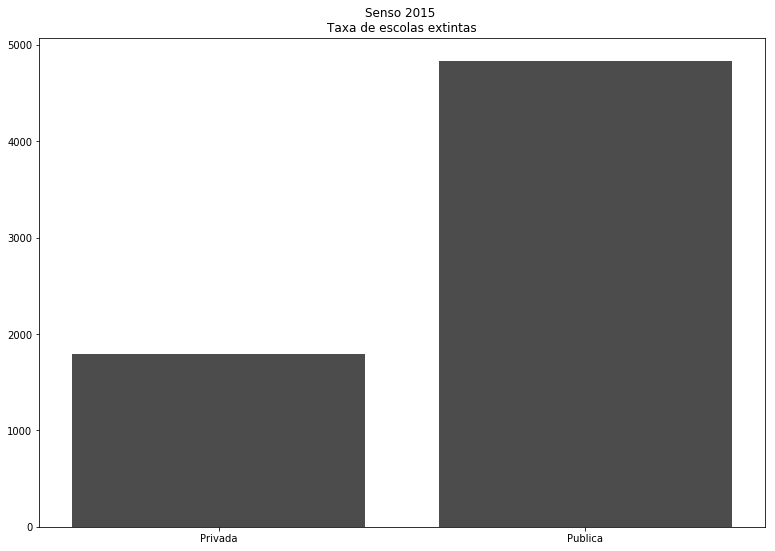

In [28]:
plt.title('Senso 2015' + ' \nTaxa de escolas extintas')
plt.bar(serie.index, serie.values, color='k', alpha=0.7)
plt.savefig('EscolasExtintasPP.png')

# Qual é a taxa de escolas extintas por região?

In [29]:
dataUF = data.CO_UF.replace([11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53],['RO','AC','AM','RR','PA','AP', 'TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS', 'MT', 'GO', 'DF'])

In [30]:
porcentagem = data.TP_SITUACAO_FUNCIONAMENTO[data.TP_SITUACAO_FUNCIONAMENTO == 3].groupby(dataUF)
serie = pd.Series(porcentagem.count())

In [31]:
plt.title('Senso 2015' + ' \nTaxa de escolas extintas por região')
plt.bar(serie.index, serie.values,color='black', alpha=0.7)
plt.savefig('EscolasExtintasUF.png')

# Qual é a taxa de escolas multilingue indigena por região?

In [32]:
dataIndigena = data.CO_LINGUA_INDIGENA.replace(data.CO_LINGUA_INDIGENA[data.CO_LINGUA_INDIGENA!=-1], 1)

In [46]:
porcentagem = dataIndigena[dataIndigena != -1].groupby(dataUF)
porcentagem2 = dataIndigena[dataIndigena != -1].groupby(dataDependencia)
serie = pd.Series(porcentagem.count())
serie2 = pd.Series(porcentagem2.count())



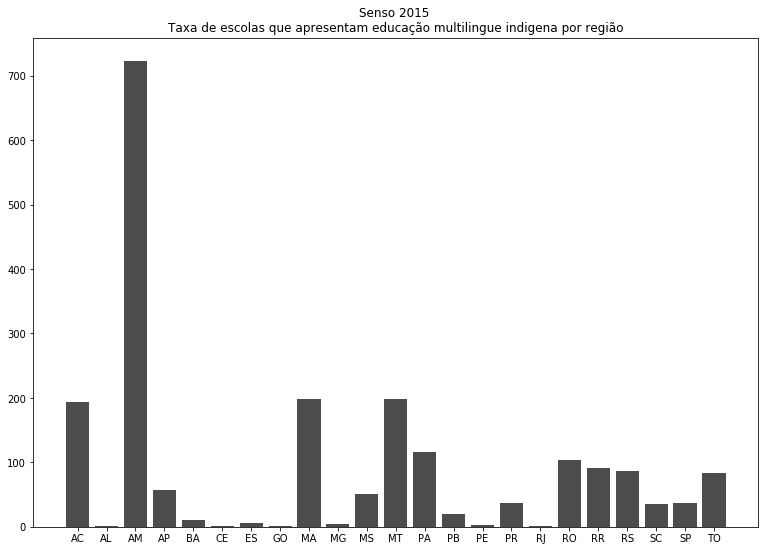

In [34]:
plt.title('Senso 2015' + ' \nTaxa de escolas que apresentam educação multilingue indigena por região')
plt.bar(serie.index, serie.values, color='black', alpha=0.7)
plt.savefig('EscolasMultiLingue.png')

# Qual é a taxa de escolas multilingue indigena entre publicas e privadas?

In [48]:
plt.title('Senso 2015' + ' \nTaxa de escolas que apresentam educação multilingue')
plt.bar(serie2.index, serie2.values, color='black', alpha=0.7)
plt.savefig('EscolasMultiLingueUF.png')

# Qual é a taxa de falta de saneamento basico entre escolas públicas e privadas?

In [38]:
relacaoEsgoto = data.IN_ESGOTO_INEXISTENTE[data.IN_ESGOTO_INEXISTENTE == 1].groupby(dataDependencia)
serieEsgoto = pd.Series(relacaoEsgoto.count())
relacaoAgua = data.IN_AGUA_FILTRADA[data.IN_AGUA_FILTRADA == 0].groupby(dataDependencia)
serieAgua = pd.Series(relacaoAgua.count())
relacaoEnergia = data.IN_ENERGIA_INEXISTENTE[data.IN_ENERGIA_INEXISTENTE == 1].groupby(dataDependencia)
serieEnergia = pd.Series(relacaoEnergia.count())


In [39]:
plt.title('Senso 2015' + ' \nTaxa de escolas que não contém tratamento de esgoto sanitário.')
axt = plt.subplot(1,1,1)
axt.bar(serieEsgoto.index, serieEsgoto.values, color='black', alpha=0.7)
axt.set_yticks([100,1000,2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
plt.savefig('EscolaSemEsgoto.png')

a:\miniconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [40]:
plt.title('Senso 2015' + ' \nTaxa de escolas que não contém água filtrada.')
axt = plt.subplot(1,1,1)
axt.bar(serieAgua.index, serieAgua.values, color='black', alpha=0.7)
axt.set_yticks([1500, 5000, 10000, 15000, 20000])
plt.savefig('EscolaSemAgua.png')

a:\miniconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [42]:
plt.title('Senso 2015' + ' \nTaxa de escolas que não contém energia eletrica')
plt.bar(serieEnergia.index, serieEnergia.values, color='black', alpha=0.7)
plt.savefig('EscolaSemEnergia.png')

# Porcentagem de escolas irregulares (Sem autorização de órgãos publicos da região)

In [43]:
relacao = data.TP_REGULAMENTACAO[data.TP_REGULAMENTACAO==0].groupby(dataDependencia)
relacao2 = data.TP_REGULAMENTACAO[data.TP_REGULAMENTACAO==0].groupby(dataUF)
serie = pd.Series(relacao.count())
serie2 = pd.Series(relacao2.count())

a:\miniconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


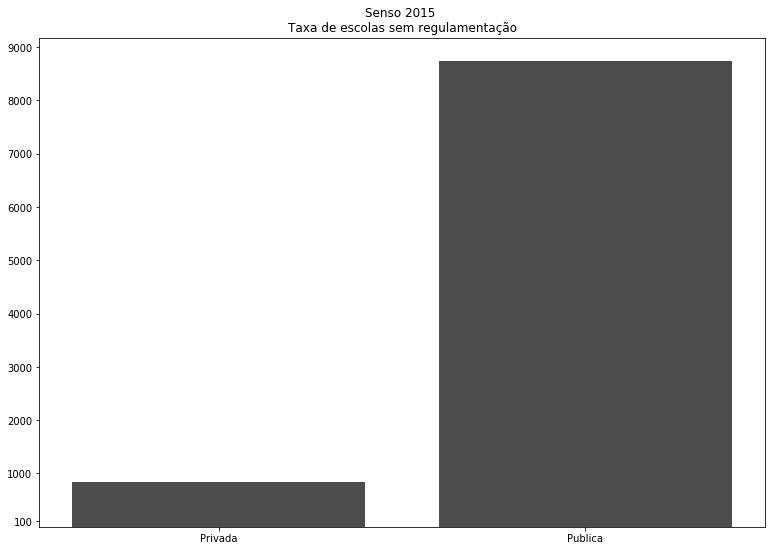

In [44]:
plt.title('Senso 2015' + ' \nTaxa de escolas sem regulamentação')
axt = plt.subplot(1,1,1)
axt.bar(serie.index, serie.values, color='black', alpha=0.7)
axt.set_yticks([100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
plt.savefig('EscolasIlegaisPP.png')

In [45]:
plt.title('Senso 2015' + ' \nTaxa de escolas sem regulamentação por estado')
plt.bar(serie2.index, serie2.values, color='black', alpha=0.7)
plt.savefig('EscolasIlegaisUF.png')